# Time Series Analysis of Wine Sales data Using LSTM

In [1]:
# ! pip install tensorflow==2.10

In [2]:
# ! pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import cufflinks as cf
import yfinance as yf

import tensorflow as tf

In [4]:
df=yf.download('RELIANCE.NS')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.441108,48051995
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.359910,77875009
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.438572,96602936
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.342155,100099436
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.271107,76935930


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.441108,48051995
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.359910,77875009
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.438572,96602936
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.342155,100099436
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.271107,76935930


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-20,2300.000000,2314.699951,2296.300049,2299.100098,2299.100098,4456656
2023-10-23,2290.000000,2306.250000,2255.250000,2263.199951,2263.199951,3926981
2023-10-25,2250.050049,2281.199951,2243.000000,2257.949951,2257.949951,5810344
2023-10-26,2251.000000,2258.000000,2220.300049,2226.500000,2226.500000,7611267
2023-10-27,2240.000000,2273.500000,2235.949951,2265.800049,2265.800049,5880801


In [7]:
df1=pd.DataFrame(df.Close)

In [8]:
df1

,Close
Date,
1996-01-01,15.917452
1996-01-02,15.793671
1996-01-03,15.913584
1996-01-04,15.766594
1996-01-05,15.658285
...,...
2023-10-20,2299.100098
2023-10-23,2263.199951
2023-10-25,2257.949951


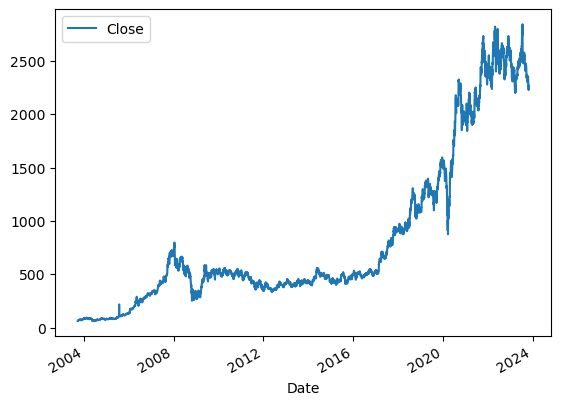

In [74]:
df1.iloc[2015:].plot();

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6993 entries, 1996-01-01 to 2023-10-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   6993 non-null   float64
dtypes: float64(1)
memory usage: 109.3 KB


In [11]:
df1.size

6993

In [12]:
dm=df1.size-5

In [75]:
dm

6988

In [13]:
train=df1.iloc[:dm]
test=df1.iloc[dm:]

In [14]:
train

,Close
Date,
1996-01-01,15.917452
1996-01-02,15.793671
1996-01-03,15.913584
1996-01-04,15.766594
1996-01-05,15.658285
...,...
2023-10-13,2349.300049
2023-10-16,2344.050049
2023-10-17,2355.250000


In [15]:
test.size

5

In [16]:
test

,Close
Date,
2023-10-20,2299.100098
2023-10-23,2263.199951
2023-10-25,2257.949951
2023-10-26,2226.500000
2023-10-27,2265.800049


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [18]:
scaler.fit(train)

MinMaxScaler()

In [19]:
scaled_train=scaler.transform(train)

In [20]:
scaled_train[:5]

array([[0.0014229 ],
       [0.00137916],
       [0.00142153],
       [0.00136959],
       [0.00133132]])

In [21]:
scaled_train.max(),scaled_train.min()

(0.9999999999999999, 0.0)

In [22]:
scaled_test=scaler.transform(test)

scaled_test.max(),scaled_test.min()

(0.8082127958279645, 0.7825586829728582)

In [23]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [78]:
scaled_train[:5]

array([[0.0014229 ],
       [0.00137916],
       [0.00142153],
       [0.00136959],
       [0.00133132]])

In [25]:
n_input=2
n_features=1

In [26]:
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [27]:
generator[0]

(array([[[0.0014229 ],
         [0.00137916]]]),
 array([[0.00142153]]))

In [28]:
X,y=generator[0]

In [29]:
X

array([[[0.0014229 ],
        [0.00137916]]])

In [30]:
y

array([[0.00142153]])

In [31]:
len(scaled_train)

6988

In [32]:
len(generator)

6986

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [34]:
n_input=5
n_features=1
train_generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [35]:
X.shape

(1, 2, 1)

In [36]:
# model=Sequential()

# model.add(LSTM(150,activation='relu',input_shape=(n_input,n_features)))
# model.add(Dense(1))
# model.compile(optimizer='adam',loss='mse')

In [37]:
model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(100, input_shape = (n_input,n_features), return_sequences = True),
        tf.keras.layers.LSTM(50, return_sequences = True),
        tf.keras.layers.LSTM(10),
        tf.keras.layers.Dense(64, activation ='relu'),
        tf.keras.layers.Dense(32, activation ='relu'),
        tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',loss='mse')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 100)            40800     
                                                                 
 lstm_1 (LSTM)               (None, 5, 50)             30200     
                                                                 
 lstm_2 (LSTM)               (None, 10)                2440      
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 76,257
Trainable params: 76,257
Non-traina

In [39]:
pwd

'C:\\Users\\losts\\Downloads\\Eduramp\\Day 5'

In [42]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=5)


from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("C:\\Users\\losts\\Downloads\\Eduramp\\Day 5\\best_model.h5", 
                             monitor = 'loss', save_best_only = True)

In [43]:
model.fit(train_generator,epochs=10,callbacks=[callback])

Epoch 1/10
6983/6983 [==============================] - 62s 9ms/step - loss: 5.9105e-04
Epoch 2/10
6983/6983 [==============================] - 63s 9ms/step - loss: 4.5056e-04
Epoch 3/10
6983/6983 [==============================] - 62s 9ms/step - loss: 3.5769e-04
Epoch 4/10
6983/6983 [==============================] - 64s 9ms/step - loss: 3.0871e-04
Epoch 5/10
6983/6983 [==============================] - 63s 9ms/step - loss: 2.9424e-04
Epoch 6/10
6983/6983 [==============================] - 64s 9ms/step - loss: 2.4692e-04
Epoch 7/10
6983/6983 [==============================] - 74s 11ms/step - loss: 2.1953e-04
Epoch 8/10
6983/6983 [==============================] - 67s 10ms/step - loss: 1.9056e-04
Epoch 9/10
6983/6983 [==============================] - 66s 9ms/step - loss: 1.7315e-04
Epoch 10/10
6983/6983 [==============================] - 67s 10ms/step - loss: 1.7174e-04


In [44]:
model.history.history.keys()

dict_keys(['loss'])

In [45]:
model.history.history['loss']

[0.0005910469917580485,
 0.0004505579126998782,
 0.0003576866292860359,
 0.00030871262424625456,
 0.00029423844534903765,
 0.0002469180035404861,
 0.0002195253036916256,
 0.00019056448945775628,
 0.0001731532101985067,
 0.0001717357081361115]

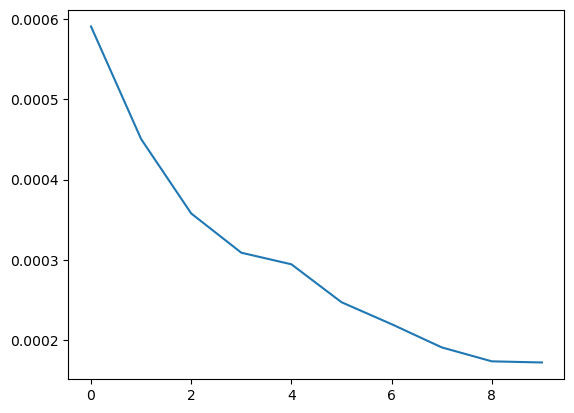

In [46]:
my_loss=model.history.history['loss']
plt.plot(range(len(my_loss)),my_loss)

In [47]:
first_eval_batch=scaled_train[-5:]
print(first_eval_batch)

[[0.82595155]
 [0.8240964 ]
 [0.82805404]
 [0.81701147]
 [0.81070393]]


In [48]:
X_train,y_train=train_generator[0]

In [49]:
X_train.shape

(1, 5, 1)

In [50]:
# so reshape the first_eval_batch with the same shape
first_eval_batch.shape

(5, 1)

In [51]:
first_eval_batch=first_eval_batch.reshape(1,n_input,n_features)

In [52]:
first_eval_batch.shape

(1, 5, 1)

In [53]:
model.predict(first_eval_batch)

1/1 [==============================] - 1s 1s/step


array([[0.8046201]], dtype=float32)

In [54]:
model.predict(first_eval_batch)[0]

1/1 [==============================] - 0s 22ms/step


array([0.8046201], dtype=float32)

# Forecast the model with unknown data

In [55]:
first_eval_batch

array([[[0.82595155],
        [0.8240964 ],
        [0.82805404],
        [0.81701147],
        [0.81070393]]])

In [56]:
first_eval_batch[:,1:,:]

array([[[0.8240964 ],
        [0.82805404],
        [0.81701147],
        [0.81070393]]])

In [57]:
first_eval_batch[:,1:,:].shape

(1, 4, 1)

In [58]:
[[model.predict(first_eval_batch)[0]]]

1/1 [==============================] - 0s 24ms/step


[[array([0.8046201], dtype=float32)]]

**Since the shape update occurs at axis 1 i.e if we append predcted value in axis 1 then shape of first_eval_batch[:,1:,:] will become (1,12,1)**

In [59]:
my_pred=[]


first_eval_batch=scaled_train[-n_input:]

current_batch=first_eval_batch.reshape(1,n_input,n_features)
current_batch

array([[[0.82595155],
        [0.8240964 ],
        [0.82805404],
        [0.81701147],
        [0.81070393]]])

In [60]:
pred=model.predict(current_batch)[0]

1/1 [==============================] - 0s 23ms/step


In [61]:
pred

array([0.8046201], dtype=float32)

In [62]:
current_batch=np.append(current_batch[:,1:,:],[[pred]],axis=1)
current_batch

array([[[0.8240964 ],
        [0.82805404],
        [0.81701147],
        [0.81070393],
        [0.80462009]]])

In [63]:
my_pred=[]


first_eval_batch=scaled_train[-n_input:]

current_batch=first_eval_batch.reshape(1,n_input,n_features)

for i in range(len(test)):
    pred=model.predict(current_batch)[0]
    my_pred.append(pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[pred]],axis=1)

1/1 [==============================] - 0s 32ms/step


In [64]:
my_pred

[array([0.8046201], dtype=float32),
 array([0.79772264], dtype=float32),
 array([0.79143864], dtype=float32),
 array([0.78533643], dtype=float32),
 array([0.77923775], dtype=float32)]

In [65]:
my_pred=scaler.inverse_transform(my_pred)
my_pred

array([[2288.93287798],
       [2269.41337599],
       [2251.62991544],
       [2234.36092499],
       [2217.10188659]])

In [66]:
test

,Close
Date,
2023-10-20,2299.100098
2023-10-23,2263.199951
2023-10-25,2257.949951
2023-10-26,2226.500000
2023-10-27,2265.800049


In [67]:
test['Prediction']=my_pred
test

C:\Users\losts\AppData\Local\Temp\ipykernel_18672\706281454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction']=my_pred


,Close,Prediction
Date,,
2023-10-20,2299.100098,2288.932878
2023-10-23,2263.199951,2269.413376
2023-10-25,2257.949951,2251.629915
2023-10-26,2226.500000,2234.360925
2023-10-27,2265.800049,2217.101887


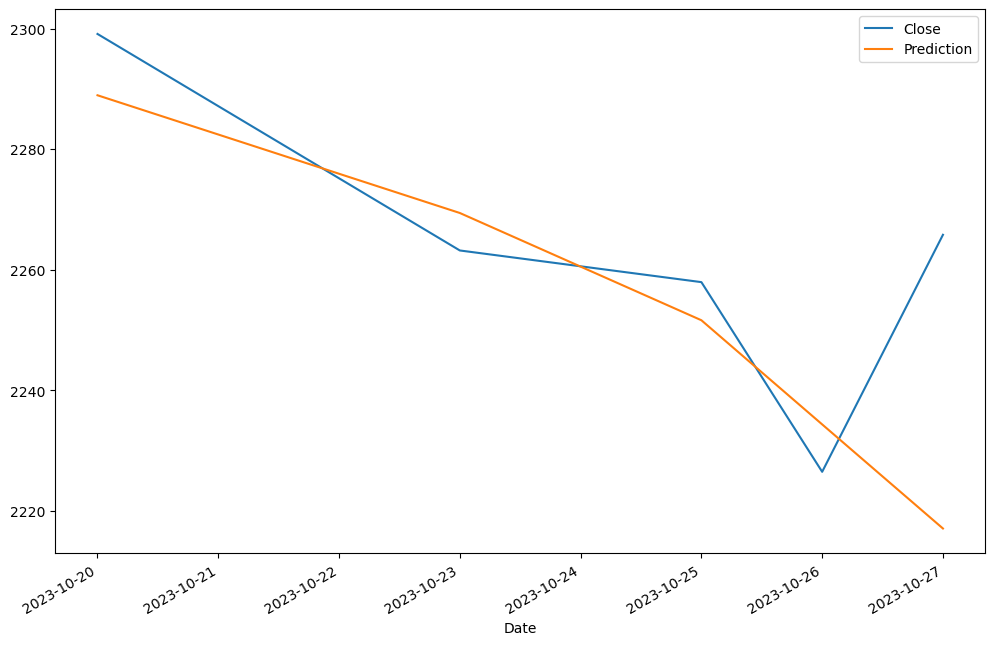

In [68]:
test.plot(figsize=(12,8))
plt.show()

In [69]:
# test.columns=['Close','Predictions','%error']

In [70]:
test['%error']=np.round((test['Close']-test['Prediction'])*100/test['Close'],2)

C:\Users\losts\AppData\Local\Temp\ipykernel_18672\957453904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['%error']=np.round((test['Close']-test['Prediction'])*100/test['Close'],2)


In [71]:
test

,Close,Prediction,%error
Date,,,
2023-10-20,2299.100098,2288.932878,0.44
2023-10-23,2263.199951,2269.413376,-0.27
2023-10-25,2257.949951,2251.629915,0.28
2023-10-26,2226.500000,2234.360925,-0.35
2023-10-27,2265.800049,2217.101887,2.15


In [ ]:
model.save('lstm.h5')

In [ ]:
from keras.models import load_model
new_model=load_model('lstm.h5')

In [ ]:
new_model.summary()